# Task_1 Predictive Modeling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the CSV data into a DataFrame
file_path = '/content/Dataset .csv'
restaurants_df = pd.read_csv(file_path)

# Select relevant columns
relevant_columns = ['Average Cost for two', 'Has Table booking', 'Has Online delivery', 'Price range', 'Aggregate rating']
data = restaurants_df[relevant_columns].copy()

# Convert relevant columns to lowercase for consistency
data['Has Table booking'] = data['Has Table booking'].str.lower()
data['Has Online delivery'] = data['Has Online delivery'].str.lower()

# Handle missing values in 'Aggregate rating' by dropping rows (if any)
data.dropna(subset=['Aggregate rating'], inplace=True)

# Separate features and target variable
X = data.drop(columns=['Aggregate rating'])
y = data['Aggregate rating']

# Define categorical and numerical features
categorical_features = ['Has Table booking', 'Has Online delivery', 'Price range']
numerical_features = ['Average Cost for two']

# Preprocessing for numerical data: impute missing values with mean
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Preprocessing for categorical data: impute missing values with most frequent and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessed features
X_preprocessed = preprocessor.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize models
linear_regressor = LinearRegression()
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
random_forest_regressor = RandomForestRegressor(random_state=42)

# Train models
linear_regressor.fit(X_train, y_train)
decision_tree_regressor.fit(X_train, y_train)
random_forest_regressor.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_regressor.predict(X_test)
y_pred_tree = decision_tree_regressor.predict(X_test)
y_pred_forest = random_forest_regressor.predict(X_test)

# Evaluate models
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, r2

linear_mae, linear_r2 = evaluate_model(y_test, y_pred_linear)
tree_mae, tree_r2 = evaluate_model(y_test, y_pred_tree)
forest_mae, forest_r2 = evaluate_model(y_test, y_pred_forest)

# Print evaluation metrics
print(f"Linear Regression - MAE: {linear_mae}, R²: {linear_r2}")
print(f"Decision Tree - MAE: {tree_mae}, R²: {tree_r2}")
print(f"Random Forest - MAE: {forest_mae}, R²: {forest_r2}")


Linear Regression - MAE: 1.0859996802928924, R²: 0.24035012603295103
Decision Tree - MAE: 0.9945627332547162, R²: 0.33137635765206463
Random Forest - MAE: 0.9938326735658141, R²: 0.3323147982057646


# Task_2 Customer Preference Analysis

In [ ]:
# Group by cuisine and calculate the average rating
average_rating_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

print("Average Rating by Cuisine (Top 10):")
print(average_rating_by_cuisine.head(10))


Average Rating by Cuisine (Top 10):
Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64


In [ ]:
# Group by cuisine and sum up the total number of votes
total_votes_by_cuisine = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

print("\nTotal Votes by Cuisine (Top 10):")
print(total_votes_by_cuisine.head(10))



Total Votes by Cuisine (Top 10):
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


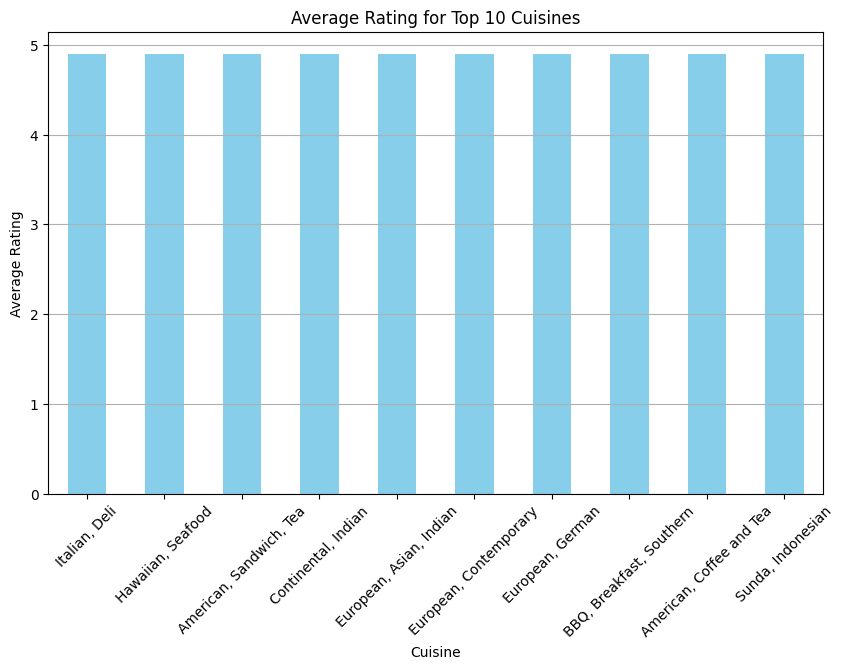

In [ ]:
# Plotting average ratings for top cuisines
top_cuisines = average_rating_by_cuisine.head(10)
plt.figure(figsize=(10, 6))
top_cuisines.plot(kind='bar', color='skyblue')
plt.title('Average Rating for Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Task_3 Data Visualization

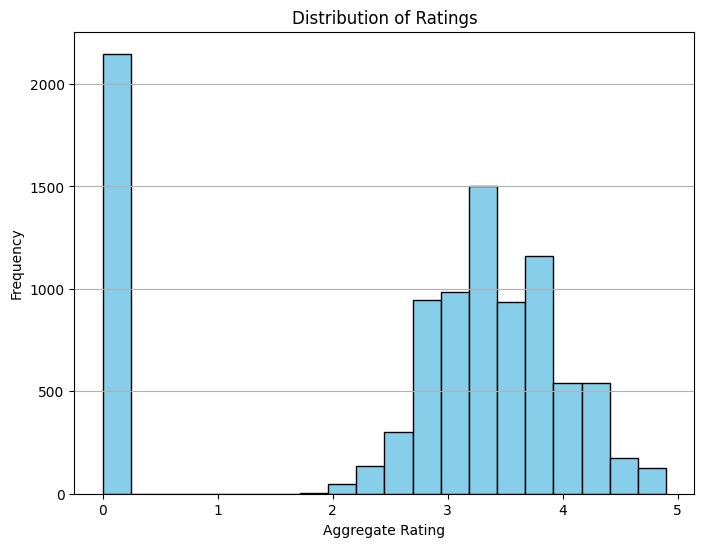

In [ ]:
import matplotlib.pyplot as plt

# Plotting histogram of ratings
plt.figure(figsize=(8, 6))
plt.hist(df['Aggregate rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


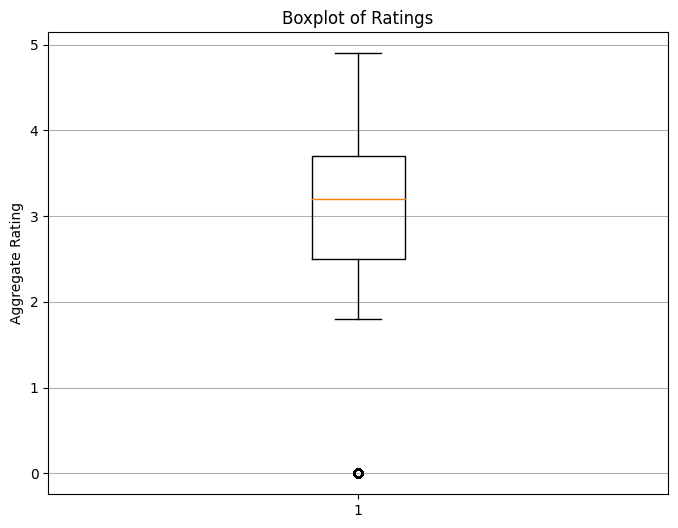

In [ ]:
# Plotting boxplot of ratings
plt.figure(figsize=(8, 6))
plt.boxplot(df['Aggregate rating'])
plt.title('Boxplot of Ratings')
plt.ylabel('Aggregate Rating')
plt.grid(axis='y')
plt.show()
